<a href="https://colab.research.google.com/github/muckitymuck/3M-Product-Image/blob/main/3M_Product_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.0 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

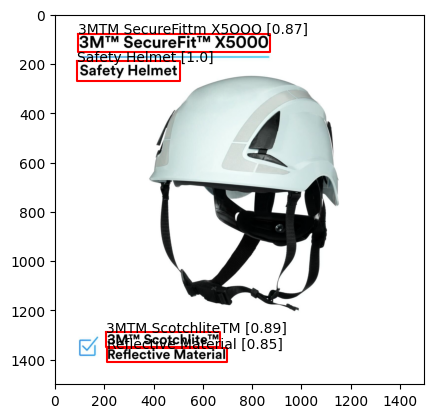

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# This needs to run only once to load the model into memory
reader = easyocr.Reader(['en'])

# reading the image
img = cv2.imread("IMG_0794.jpg")

# run OCR
results = reader.readtext(img)

# show the image and plot the results
plt.imshow(img)
for res in results:
    # bbox coordinates of the detected text
    xy = res[0]
    xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
    # text results and confidence of detection
    det, conf = res[1], res[2]
    # show time :)
    plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    plt.text(xy1[0], xy1[1], f'{det} [{round(conf, 2)}]')

In [ ]:
print(results)

[([[93, 76], [874, 76], [874, 149], [93, 149]], '3MTM SecureFittm X5OOO', 0.8744060352785207), ([[91, 189], [506, 189], [506, 269], [91, 269]], 'Safety Helmet', 0.9999389864354883), ([[206, 1287], [671, 1287], [671, 1348], [206, 1348]], '3MTM ScotchliteTM', 0.8871848029754219), ([[210, 1351], [700, 1351], [700, 1408], [210, 1408]], 'Reflective Material', 0.8531348601416412)]


In [ ]:
# Extracting text strings
extracted_texts = [result[1] for result in results]

imgtext = ', '.join(extracted_texts)

# Printing the extracted text strings
for text in extracted_texts:
    print(text)

print(imgtext)

3MTM SecureFittm X5OOO
Safety Helmet
3MTM ScotchliteTM
Reflective Material
3MTM SecureFittm X5OOO, Safety Helmet, 3MTM ScotchliteTM, Reflective Material


In [ ]:
!pip install huggingface_hub
!pip install langchain
!pip install ctransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
cftoken = userdata.get('cloudflare_token')

In [ ]:
#from langchain import PromptTemplate, LLMChain

#repo_id = "daryl149/llama-2-7b-chat-hf"
#prompt = PromptTemplate(template="Question: {question}\nAnswer:", input_variables=["question"])
#question = "AI will do "

#llm = HuggingFaceHub(
#    repo_id=repo_id, model_kwargs={"temperature": 0.5, "max_length": 64}, huggingfacehub_api_token=api_token
#)
#llm_chain = LLMChain(prompt=prompt, llm=llm)

#print(llm_chain.run(question))
#from ctransformers import AutoModelForCausalLM

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
#llm = AutoModelForCausalLM.from_pretrained("TheBloke/Llama-2-7b-Chat-GGUF", model_file="llama-2-7b-chat.q4_K_M.gguf", model_type="llama", gpu_layers=50)

#print(llm("AI is going to"))

import requests


API_BASE_URL = "https://api.cloudflare.com/client/v4/accounts/4888d86c957c4234e0109df5e642e1b3/ai/run/"
headers = {"Authorization": f"Bearer {cftoken}"}


def run(model, inputs):
    input = { "messages": inputs }
    response = requests.post(f"{API_BASE_URL}{model}", headers=headers, json=input)
    return response.json()


inputs = [
    { "role": "system", "content": "You are a consumer product marketer" },
    { "role": "user", "content": f"Write a short description about the product given the words from the image: {imgtext}"}
];
output = run("@cf/meta/llama-2-7b-chat-int8", inputs)
print(output)



{'result': {'response': "Introducing the 3MTM SecureFittm X5OOO Safety Helmet, designed to provide maximum protection and visibility on the job site. With a durable ABS shell and a secure fit system, this helmet is built to withstand even the toughest working conditions. The 3MTM ScotchliteTM reflective material provides enhanced visibility in low-light environments, ensuring maximum safety for workers. Whether you're working on a construction site, a warehouse, or any other hazardous environment, the 3MTM SecureFittm X5OOO Safety Helmet is the perfect choice for maximum safety and peace of mind."}, 'success': True, 'errors': [], 'messages': []}


In [ ]:
gen_text = output['result']['response']
print(gen_text)

Introducing the 3MTM SecureFittm X5OOO Safety Helmet, designed to provide maximum protection and visibility on the job site. With a durable ABS shell and a secure fit system, this helmet is built to withstand even the toughest working conditions. The 3MTM ScotchliteTM reflective material provides enhanced visibility in low-light environments, ensuring maximum safety for workers. Whether you're working on a construction site, a warehouse, or any other hazardous environment, the 3MTM SecureFittm X5OOO Safety Helmet is the perfect choice for maximum safety and peace of mind.
